<img src="img/usmlogo.png" style="float:right;height:100px">
<img src="img/dilogo.png" style="float:left;height:100px">
<center>
    <h1> Laboratorio 3 </h1>
    <h2> Profesor: Ricardo Ñanculef </h2>
    <h3> Ayudante: Gabriel Ortega </h3>
    <h4> Alumno ; Rol ; Malla </h4>
    <h4> Alumno2 ; Rol ; Malla </h4>
</center>
<p>
<center><h4>_Fecha_</h4></center>
</p>

## Instrucciones


La modalidad de trabajo será mediante el uso de jupyter notebook. El notebook debe ser desarrollado en parejas o individual pero solamente una de esas modalidades (Pueden cambiar de compañero o modalidad en cada laboratorio). Este laboratorio debe ser entregado a más tardar el día Viernes 30 de Noviembre, no se aceptan entregas enviadas al correo del ayudante.

La **modalidad de entrega será un archivo Apellido1_Apellido2_Lab2.zip/.tar.gz/rar** que contenga un notebook que incluya todas las preguntas con sus respectivas respuestas + un README que indique la forma correcta de ejecutar su notebook. Este notebook presenta ciertas preguntas marcadas con **O:** que indican que para los alumnos de malla nueva es opcional, pero obligatoria para los alumnos de malla vieja. En el caso de haber una pareja con un integrante de malla nueva y uno de malla vieja, se considera malla vieja. El laboratorio puede ser trabajado tanto en lenguaje R como en lenguaje python (para los que usen python 2.X, absténganse a las consecuencias). Lea bien el enunciado.

Su notebook debe incluir un encabezado como el presente en este notebook (Si utilizará las imagenes recuerde adjuntar la carpeta de imagenes o borrarlas del markdown), **para la malla debe colocar INF-280 o ILI-280** según corresponda (no ponga otras cosas o se descontará). 

**Cualquier copia detectada implicará reprobación del laboratorio con nota 0 (lo que implica reprobar el ramo con nota 0) además de la notificación correspondiente al Profesor.** 

## 1. Gradiente Ascendente (35p)

> Spoiler de machine learning :) 

La técnica de gradiente ascendente (o descendente) es un algoritmo iterativo para hallar los óptimos de una función diferenciable, en especial cuando los óptimos de esta resultan difíciles de obtener analíticamente. La regla que sigue este algoritmo ascendente es la siguiente:

$$\theta_{n+1} = \theta_{n} + \eta \cdot \nabla F(\theta_{n})$$

Donde $\nabla F$ es la derivada de la función que nos interesa optimizar, $\theta$ el estimador que nos interesa determinar y $\eta$ un coeficiente llamado "Factor de aprendizaje" $\in [0,1]$. Este algoritmo se detiene una vez realizada una cierta cantidad de iteraciones o una vez que la variación es más pequeña que un umbral dado.

En este caso se trabajará con una función cuyo óptimo analítico puede obtenerse fácilmente para términos de comparación. Se trabajará con una distribución de Poisson de $\lambda$ desconocido (poisson.csv) y la función de log-verosimilitud. Se sabe que la función de la distribución de poisson es:

\begin{aligned}
\frac{\lambda ^{x}\cdot e^{-\lambda}}{x!}
\end{aligned}

>a) Plantee las ecuaciones de log-verosimilitud y la primera y segunda derivada de esta función para determinar el máximo verosímil de $\lambda$ ¿En base a las ecuaciones, se puede decir que se obtendrá un máximo? 

#### Respuesta
Planteamiento de la máxima log-verosimilitud

$$\ell (\lambda) = \sum_{n=1}^{n} ln(\frac{e^{-\lambda} \cdot \lambda^{x}}{x!})$$

Se calcula la ecuación para encontrar el punto de inflexión del planteamiento

$$Max(\ell (\lambda)) = \frac{d}{d\lambda}(\sum_{n=1}^{n} ln(\frac{e^{-\lambda} \cdot \lambda^{x_i}}{x_i!}))$$

$$Max(\ell (\lambda)) = \frac{d}{d\lambda}(\sum_{i=1}^{n} -\lambda + x_i \cdot ln(\lambda) - ln(x_i!)) = 0$$

$$Max(\ell (\lambda)) = \sum_{i=1}^{n} -1 + \frac{x_i}{\lambda} = 0$$

Se plantea la segunda derivada para saber si la función obtenida es máximo o mínimo

$$\frac{d²}{d\lambda²}(\sum_{i=1}^{n} -\lambda + x_i \cdot ln(\lambda) - ln(x_i!)) = 0$$

$$- \sum_{i=1}^{n} \frac{x_i}{\lambda²} < 0$$

>b) Determine el máximo verosímil de $\lambda$ analítico (resolviendo las ecuaciones correspondientes)

$$Max(\ell (\lambda)) = \frac{1}{n}*\sum_{n=1}^{n} x = \lambda$$

$$Max(\ell (\lambda)) = \overline{x} = \lambda$$

>c) Utilizando el método de gradiente ascendente determine el valor del máximo verosímil de $\lambda$ y compare con lo obtenido en b). Esto implica que debe elegir un número de iteraciones o un umbral (o ambos), elegir un factor de aprendizaje y un $\lambda_{0} = 0$. **Si no responde esta pregunta anula todo el puntaje de esta sección.**

*Hint: use un factor de aprendizaje pequeño*

Tomando en cuenta las funciones planteadas anteriormente:

$$\lambda_{n+1} = \lambda_{n} + \eta \cdot \nabla F(\lambda_{n})$$

$$\nabla F(\lambda_{k}) =  \sum_{i=1}^{n} -1 + \frac{x_i}{\lambda_k}$$

In [23]:
#Se obtiene el database de los números distribuidos por lambda 
DBpoisson <- read.csv("poisson.csv",header = T)
#Obtenemos el lambda a partir del máximo verosimil
prom <- mean(DBpoisson$X)
print("Promedio con la muestra completa de los datos (N=1000)")
print(prom)
#Definimos la gradiente ascendente
Mult = 0.1
num = 100
sumatoria = 0
alpha_start = 0.2
suma = 0
for(i in 1:num){
    pois = DBpoisson[i,1]
    suma = suma + pois
}
promedio = suma/num
print("Promedio con una muestra de N=100")
print(promedio)
for(i in 1:num){
    pois = DBpoisson[i,1]
    sumatoria = sumatoria + pois
    alphaplus =  alpha_start + Mult * (i*(-1)+(sumatoria/alpha_start))
    alpha_start = alphaplus
}
print("Valor del gradiente positivo en la iteración 100")
print(alphaplus)

[1] "Promedio con la muestra completa de los datos (N=1000)"
[1] 35.397
[1] "Promedio con una muestra de N=100"
[1] 36.32
[1] "Valor del gradiente positivo en la iteración 100"
[1] 36.34344


>d) Utilizando el método de c) grafique el valor de $\lambda$ en cada iteración. ¿Qué observa a partir de este gráfico?

[1] 35.397
[1] 36.34344


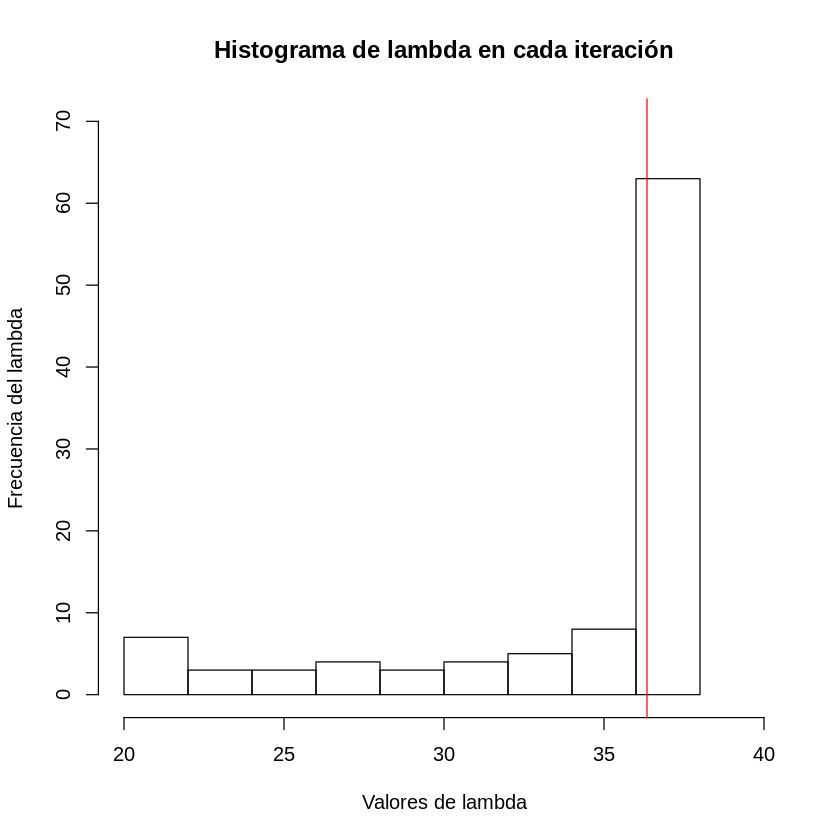

In [24]:
DBpoisson <- read.csv("poisson.csv",header = T)

#hist(DBpoisson$X, xlab = "Numeros",col = "yellow",border = "blue")

lista = c()
prom <- mean(DBpoisson$X)
print(prom)
Mult = 0.1
num = 100
sumatoria = 0
alpha_start = 0.2
for(i in 1:num){
    pois = DBpoisson[i,1]
    sumatoria = sumatoria + pois
    alphaplus =  alpha_start + Mult * (i*(-1)+(sumatoria/alpha_start))
    lista <- c(lista, alphaplus)
    alpha_start = alphaplus
}
print(alphaplus)
#hist(lista)
hist(lista, main="Histograma de lambda en cada iteración" , xlab = "Valores de lambda",ylab = "Frecuencia del lambda", xlim = c(20,40), ylim = c(0,70))
abline(v=alphaplus,col="red")

#### Respuesta
Observando el histograma graficado podemos decir que los valores de lambda por iteración, tienden a tener el valor de la gradiente positiva y por lo dicho en el ejercicio anterior, este valor es el estimador de máxima verosimilitud.

> **O** e) Repita d) pero utilizando distintos valores de factor de aprendizaje $\eta \in [0,1]$ y comente lo que sucede.

**Bonus (opcional para todos), bonificación de hasta un 10% en su nota de este laboratorio** 

> f) Si quisiera resolver este problema como gradiente descendente ¿Cómo deberían ser las ecuaciones involucradas? Escríbalas todas y además explique en qué consiste la regla que aplica el gradiente.

## 2. Método de la Función Inversa (15p)

El teorema de la función inversa permite generar variables aleatorias continuas con una función de distribución $F(x)$ a partir de la inversa $F^{-1}(x)$. Donde los valores generados en la función inversa están regidos por una distribución uniforme $u \sim U(0,1)$. 

En esta sección se trabajará con la distribución Weibull, cuya función de densidad de probabilidad está dada por:

\begin{aligned}
Weibull(\alpha,\beta) = \frac{\alpha}{\beta^{\alpha}}x^{\alpha -1}\cdot exp \left( \frac{-x}{\beta}\right)^{\alpha}
\end{aligned}

>a) Calcule la función de densidad acumulada. Determine si esta función es invertible o no

$F(x) = 1 - e^{-(\frac{x}{\alpha })^{\beta }}$

Si es invertible, ya que 

$F(x1) = F(x2)$ ssi $x1 = x2$ y F(x) esta definida para todo valor de x.

>b) Obtener la función inversa despejando la variable X. La distribución Weibull a trabajar tiene parámetros $\alpha = 7$ y $\beta = 2$.

$x = 7\sqrt{-\ln \left(1-x\right)}$

>c) Genere 10000 valores $u\sim U(0,1)$ y reemplácelos en la función inversa que obtuvo. Luego proceda a graficar la densidad de los resultados obtenidos del reemplazo en su función inversa.

In [19]:
data = runif(10000, 0, 1)


valores = vector()
for(i in 1:10000){
    valores[i] = 7*(-log(1-data[i]))**0.5
    }
df = data.frame(valores)
ggplot(df_wei, aes(x = valores)) + 
       geom_histogram(aes(y = ..density..), fill = 'dodgerblue1', alpha = 0.8, binwidth=.5) + 
       geom_density(colour = 'firebrick1') + xlab(expression(bold('Weibull Inversa'))) + 
       ylab(expression(bold('Densidad')))


>d) Genere una distribución Weibull de tamaño 10000 con los mismos $\alpha$ y $\beta$ que la trabajada anteriormente, grafique la densidad de los valores generados y concluya respecto a lo observado mencionando, además, una ventaja del método de la función 
inversa.

In [18]:

wei = rweibull(10000, 7, 2)
df_wei = data.frame(wei, valores)

library(ggplot2)

ggplot(df_wei, aes(x = wei)) + 
       geom_histogram(aes(y = ..density..), fill = 'dodgerblue1', alpha = 0.8, binwidth=.5) + 
       geom_density(colour = 'firebrick1') + xlab(expression(bold('Weibull Random'))) + 
       ylab(expression(bold('Densidad')))

ggplot(df_wei, aes(x = valores)) + 
       geom_histogram(aes(y = ..density..), fill = 'dodgerblue1', alpha = 0.8, binwidth=.5) + 
       geom_density(colour = 'firebrick1') + xlab(expression(bold('Weibull con función Inversa'))) + 
       ylab(expression(bold('Densidad')))


Con la función inversa existen más valores diferentes comparado con usar rweibull con los parametros indicados.

## 3. Teorema del Límite Central (50p)

#### 3.1 TLC Univariado (20p)

El teorema del límite central es uno de los postulados más importantes de estadística. En esta sección se procederá a comprobarlo en su forma clásica. 

Sea $x_{1},x_{2},....,x_{n}$ una muestra aleatoria de tamaño $n$ IID extraidas de una distribución con valor esperado $\mu$ y varianza finita $\sigma^{2}$. Si calculamos la media muestral: 

$$ \bar{X}_{n} = \frac{\sum x_{i}}{n}$$

Y repetimos este proceso una gran cantidad de veces $(P)$ tendremos una distribución de las medias de las muestras (*Sample mean distribution*). El TLC establece que, si el número de repeticiones es lo suficientemente grande: 

$$ \bar{X} \sim N\left(\mu,\sqrt{\frac{\sigma^{2}}{n}}\right)$$ 

Trabajará con una variable aleatoria discreta cuyas probabilidades están dadas por la siguiente tabla:

| Valor | Probabilidad |
|:-----:|:------------:|
|   1   |      0.1     |
|   2   |      0.2     |
|   5   |     0.05     |
|   6   |     0.05     |
|   7   |      0.4     |
|   9   |     0.15     |
|   10  |     0.05     |


> **O** a) Grafique la densidad de esta distribución y comente lo que observa. ¿Le parece normal (refiriéndose a la distribución normal)?

>b) Determine el valor esperado de esta distribución y la varianza 

In [28]:
valor_esperado = 1*0.1 + 2*0.2 + 5*0.05 + 6 * 0.05 + 7 * 0.04 + 9 * 0.15 + 10*0.05
print("Valor Esperado")
valor_esperado

e_x_2 = 1*0.1 + 4*0.2 + 25*0.05 + 36 * 0.05 + 49 * 0.04 + 81 * 0.15 + 100*0.05
e_2_x = valor_esperado**2

varianza = e_x_2 - e_2_x
print("Varianza")
varianza

[1] "Valor Esperado"


[1] 3.18

[1] "Varianza"


[1] 12.9476

$\mu$ = 3.18


$\sigma^{2}$ = 12.9476

El Valor Esperado de la tabla es 3.18 y la Varianza es 12.9476

>c) Con $P = 10000$ calcule la media de muestras de tamaño : $n \in[2,10,30,100,1000]$ 

Código Hint: (Que puede implementar de otra manera si le acomoda)

**Python**
```python
import numpy as np
tamano_n = np.array([]) #para cada n
for i in range(P):
    tamano_n = np.append(tamano_n,np.mean(muestra_de_tamano_n))
```

**R**
```r
tamano_n = vector() #para cada n
for(i in 1:P){
    tamano_n[i] = mean(muestra_de_tamano_n)
    }
```

In [29]:
tamano_2 = vector() #para cada n
P = 1000
for(i in 1:P){
    tamano_2[i] = mean(sample(1:10,2,replace=T))
    }

cat("Tamaño 2, mediana: ",mean(tamano_2), "\n")


tamano_10 = vector() #para cada n
P = 1000
for(i in 1:P){
    tamano_10[i] = mean(sample(1:10,10,replace=T))
    }

cat("Tamaño 10, mediana: ",mean(tamano_10), "\n")


tamano_30 = vector() #para cada n
P = 1000
for(i in 1:P){
    tamano_30[i] = mean(sample(1:10,30,replace=T))
    }

cat("Tamaño 30, mediana: ",mean(tamano_30), "\n")


tamano_100 = vector() #para cada n
P = 1000
for(i in 1:P){
    tamano_100[i] = mean(sample(1:10,100,replace=T))
    }

cat("Tamaño 100, mediana: ",mean(tamano_100), "\n")


tamano_1000 = vector() #para cada n
P = 1000
for(i in 1:P){
    tamano_1000[i] = mean(sample(1:10,1000,replace=T))
    }

cat("Tamaño 1000, mediana: ",mean(tamano_1000), "\n")



Tamaño 2, mediana:  5.5035 
Tamaño 10, mediana:  5.5306 
Tamaño 30, mediana:  5.504933 
Tamaño 100, mediana:  5.50157 
Tamaño 1000, mediana:  5.499466 


Tamaño 2, mediana:  5.436

Tamaño 10, mediana:  5.5265 

Tamaño 30, mediana:  5.494533 

Tamaño 100, mediana:  5.49805 

Tamaño 1000, mediana:  5.503083 

>d) **O:** Explique el concepto de *Skewness* y *Kurtosis* 

>e) Para cada vector de datos haga un histograma incluyendo la curva de densidad, además de indicar la media, varianza, skewness y kurtosis de los datos. Comente lo que sucede con cada campo comparando los gráficos y en base a lo que enuncia el TLC.

Kurtosis y Skewness: python $\rightarrow$ scipy | R $\rightarrow$ e1071


In [30]:
install.packages("moments")


Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


Varianza (n=2) 4.192931 
Media    (n=2) 5.5035 
Skewness (n=2) 0.02576663 
Kurtosis (n=2) 4.192931 


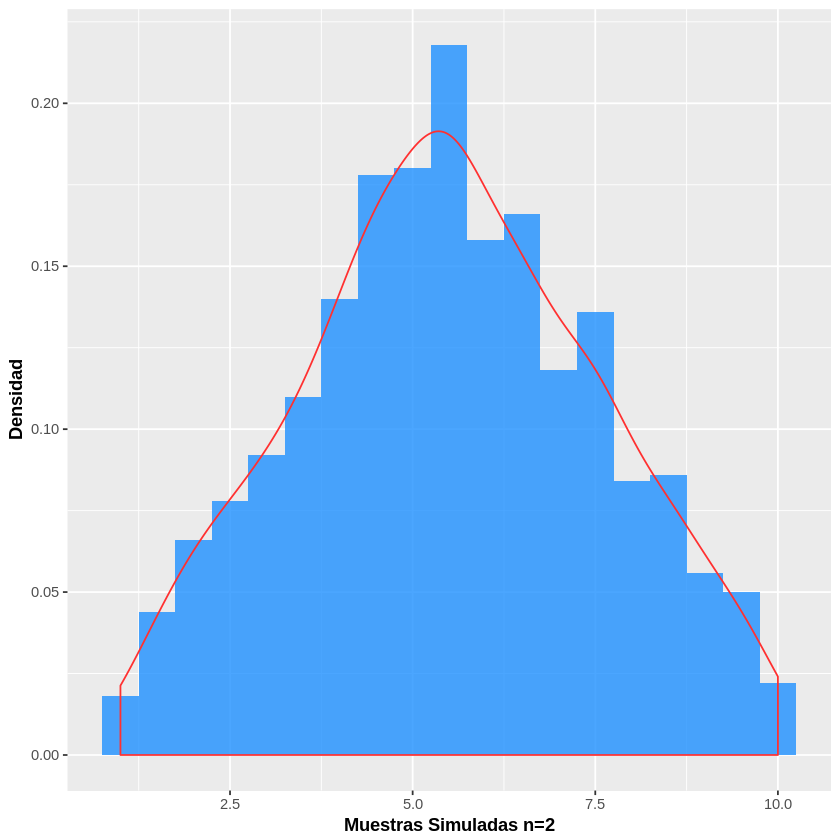

In [31]:
library(ggplot2)

library(moments)

tamano_2_frame = data.frame(tamano_2)

cat("Varianza (n=2)", var(tamano_2), "\n")
cat("Media    (n=2)", mean(tamano_2), "\n")
cat("Skewness (n=2)", skewness(tamano_2), "\n")
cat("Kurtosis (n=2)", var(tamano_2_frame), "\n")




ggplot(tamano_2_frame, aes(x = tamano_2)) + 
       geom_histogram(aes(y = ..density..), fill = 'dodgerblue1', alpha = 0.8, binwidth=.5) + 
       geom_density(colour = 'firebrick1') + xlab(expression(bold('Muestras Simuladas n=2'))) + 
       ylab(expression(bold('Densidad')))





Varianza (n=10) 0.7865302 
Media    (n=10) 5.5306 
Skewness (n=10) -0.05527624 
Kurtosis (n=10) 0.7865302 


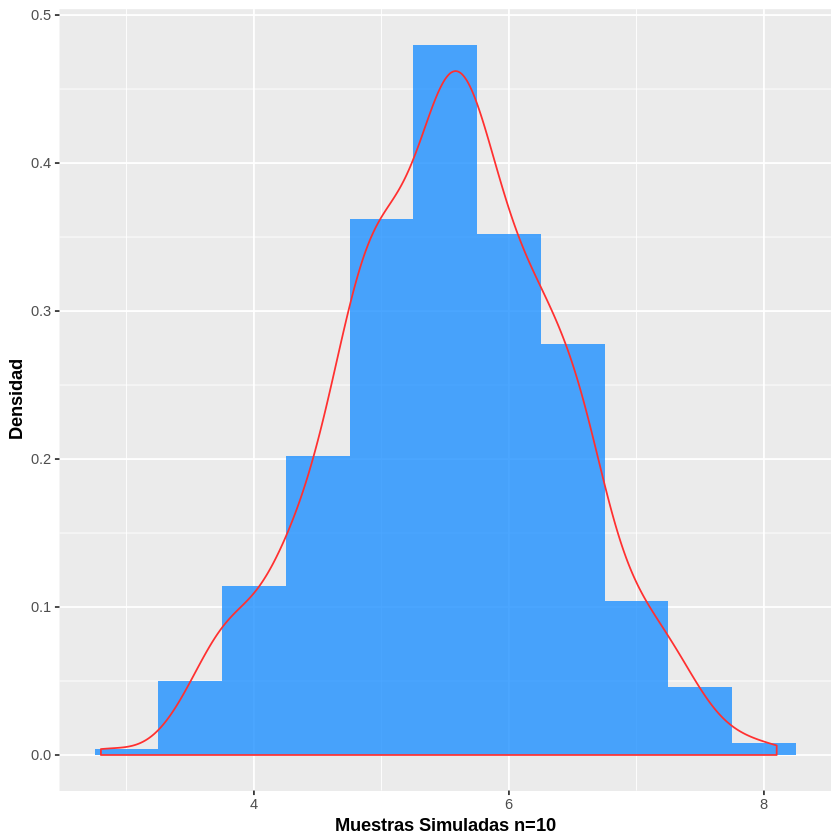

In [32]:
tamano_10_frame = data.frame(tamano_10)

cat("Varianza (n=10)", var(tamano_10), "\n")
cat("Media    (n=10)", mean(tamano_10), "\n")
cat("Skewness (n=10)", skewness(tamano_10), "\n")
cat("Kurtosis (n=10)", var(tamano_10_frame), "\n")

ggplot(tamano_10_frame, aes(x = tamano_10)) + 
       geom_histogram(aes(y = ..density..), fill = 'dodgerblue1', alpha = 0.8, binwidth=.5) + 
       geom_density(colour = 'firebrick1') + xlab(expression(bold('Muestras Simuladas n=10'))) + 
       ylab(expression(bold('Densidad')))




Varianza (n=30) 0.2706419 
Media    (n=30) 5.504933 
Skewness (n=30) -0.1604315 
Kurtosis (n=30) 0.2706419 


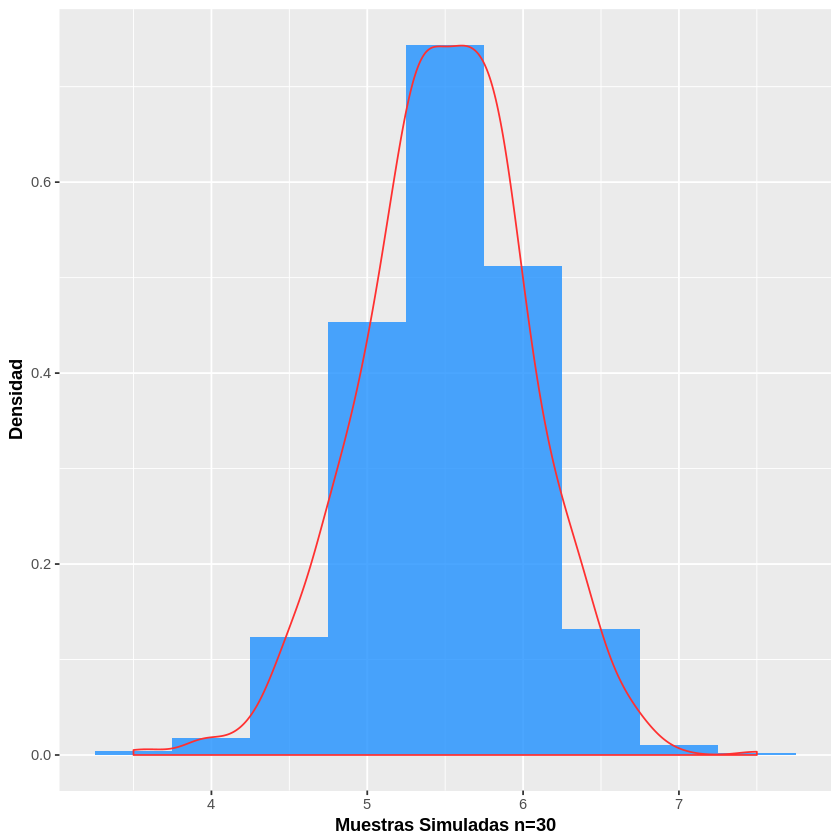

In [33]:
tamano_30_frame = data.frame(tamano_30)

cat("Varianza (n=30)", var(tamano_30), "\n")
cat("Media    (n=30)", mean(tamano_30), "\n")
cat("Skewness (n=30)", skewness(tamano_30), "\n")
cat("Kurtosis (n=30)", var(tamano_30_frame), "\n")

ggplot(tamano_30_frame, aes(x = tamano_30)) + 
       geom_histogram(aes(y = ..density..), fill = 'dodgerblue1', alpha = 0.8, binwidth=.5) + 
       geom_density(colour = 'firebrick1') + xlab(expression(bold('Muestras Simuladas n=30'))) + 
       ylab(expression(bold('Densidad')))






Varianza (n=100) 0.07823847 
Media    (n=100) 5.50157 
Skewness (n=100) 0.1377474 
Kurtosis (n=100) 0.07823847 


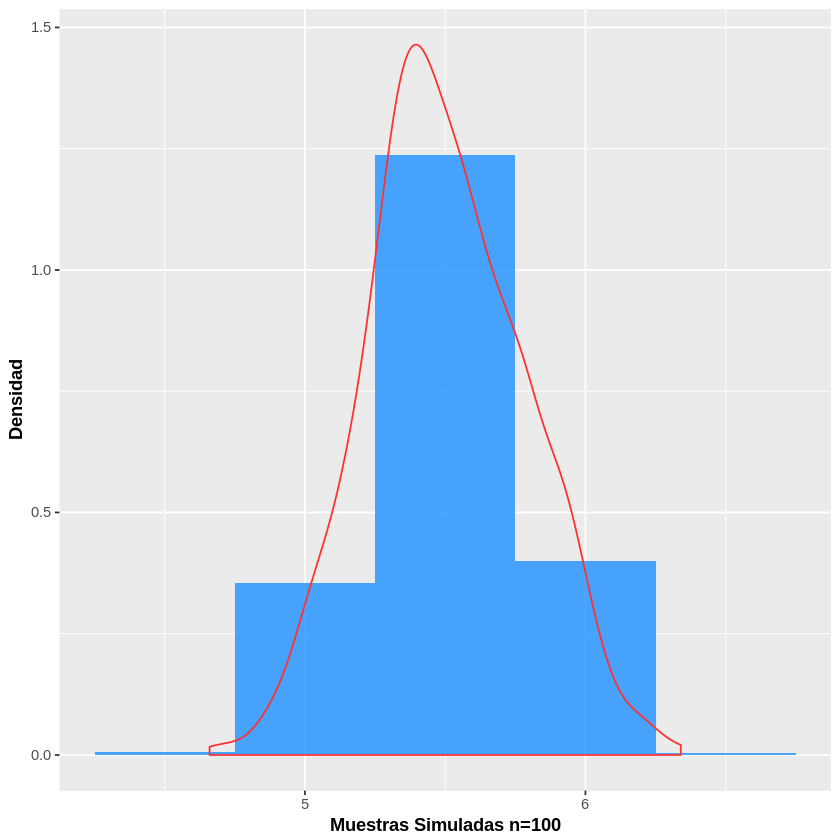

In [34]:
tamano_100_frame = data.frame(tamano_100)

cat("Varianza (n=100)", var(tamano_100), "\n")
cat("Media    (n=100)", mean(tamano_100), "\n")
cat("Skewness (n=100)", skewness(tamano_100), "\n")
cat("Kurtosis (n=100)", var(tamano_100_frame), "\n")


ggplot(tamano_100_frame, aes(x = tamano_100)) + 
       geom_histogram(aes(y = ..density..), fill = 'dodgerblue1', alpha = 0.8, binwidth=.5) + 
       geom_density(colour = 'firebrick1') + xlab(expression(bold('Muestras Simuladas n=100'))) + 
       ylab(expression(bold('Densidad')))




Varianza (n=1000) 0.007887318 
Media    (n=1000) 5.499466 
Skewness (n=1000) -0.08163914 
Kurtosis (n=1000) 0.007887318 


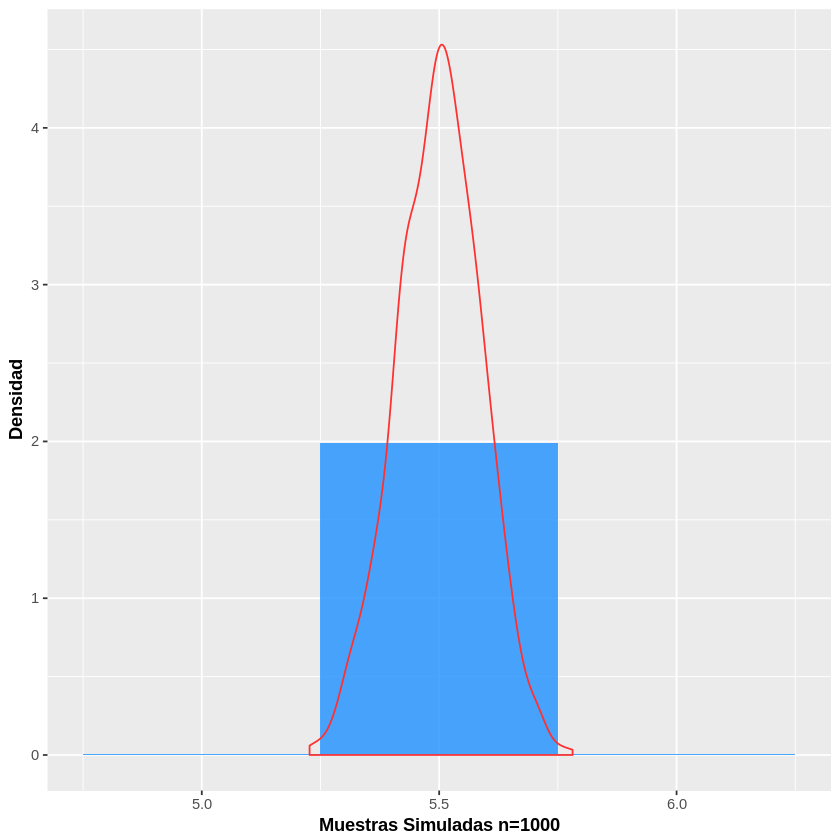

In [35]:
tamano_1000_frame = data.frame(tamano_1000)

cat("Varianza (n=1000)", var(tamano_1000), "\n")
cat("Media    (n=1000)", mean(tamano_1000), "\n")
cat("Skewness (n=1000)", skewness(tamano_1000), "\n")
cat("Kurtosis (n=1000)", var(tamano_1000_frame), "\n")

ggplot(tamano_1000_frame, aes(x = tamano_1000)) + 
       geom_histogram(aes(y = ..density..), fill = 'dodgerblue1', alpha = 0.8, binwidth=.5) + 
       geom_density(colour = 'firebrick1') + xlab(expression(bold('Muestras Simuladas n=1000'))) + 
       ylab(expression(bold('Densidad')))

Mientras P es más grande, la dispersión de los datos es menor, aumentando la densidad de los datos en torno a su media.

#### 3.2 TLC Multivariado (30p) 

Si en este caso se cuenta con una matriz de datos (una tabla con mas de 1 atributo) y las filas de esta matriz representan una muestra de una variable aleatoria multivariada $\bar{\chi}$ con $E(\,\bar{\chi}) = \mu$ y $Cov(\,\bar{\chi}) = \sum$ entonces la distribución asintótica de $\bar{\chi}$ es una normal multivariada con vector de medias $\mu$ y matriz de covarianza $\frac{1}{N}\cdot \sum$. Además de que se espera que la proyección en cada eje sea normal.

Si hay tres variables involucradas: 

$$X \sim Distribución\, en\; 3.1$$

$$Y \sim Poi(\lambda = 10)$$

$$Z \sim U(1,100)$$

>a) Genere un dataset que cumpla las distribuciones mencionadas anteriormente con 20000 filas

In [36]:
X <- rnorm(20000, 3.18, 12.9476)
Y <- rpois(20000, 10)
Z <- runif(20000, 1, 100)


dataset = data.frame(X, Y, Z)

dataset



X,Y,Z
7.16153861,7,89.560224
27.70536061,9,94.007183
-20.33845404,9,87.345976
2.09966510,14,72.241638
-17.01284278,7,67.743549
8.41062855,9,13.743165
-6.10923288,14,48.681829
0.66147720,5,91.082744
41.75528948,12,91.906472
-8.60975608,12,40.912737


>b) Obtenga el vector $\vec{\mu}$ y la matriz de covarianza $\sum$ del dataset generado

In [37]:

medias = vector() #para cada n

medias[1] = mean(dataset$X)
medias[2] = mean(dataset$Y)
medias[3] = mean(dataset$Z)
medias


S <- cov(dataset)
S


[1]  3.156628 10.035850 50.467244

,X,Y,Z
X,166.6675633,-0.11624779,2.79552805
Y,-0.1162478,10.08566906,-0.08714274
Z,2.7955281,-0.08714274,817.04654592


# $\vec{\mu}$ 

(3.30668057065034, 9.9917, 50.6714221064263)
# $\sum$



| X | Y           | Z          |             |
|---|-------------|------------|-------------|
| X | 169.5055862 | -0.4203665 | 0.6816698   |
| Y | -0.4203665  | 9.8949259  | -0.5243467  |
| Z | 0.6816698   | -0.5243467 | 814.5565730 |

>c) Con $N = 10000$ y un tamaño muestral de $100$ demuestre lo que enuncia el teorema del límite central multivariado obteniendo un vector $\vec{\mu '}$ y una nueva matriz de covarianza $\sum '$ comparando con lo obtenido en b). También compruebe la proyección en cada eje.

In [39]:

N = 10
for(i in 1:N){
    temp = dataset[sample(nrow(dataset), 100), ]
    temp
}


[1]  3.19561 10.05151 50.42896

,v_norm,v_pois,v_unif
v_norm,1.60265809,0.01315515,0.18758818
v_pois,0.01315515,0.09585247,0.01139487
v_unif,0.18758818,0.01139487,8.74620326


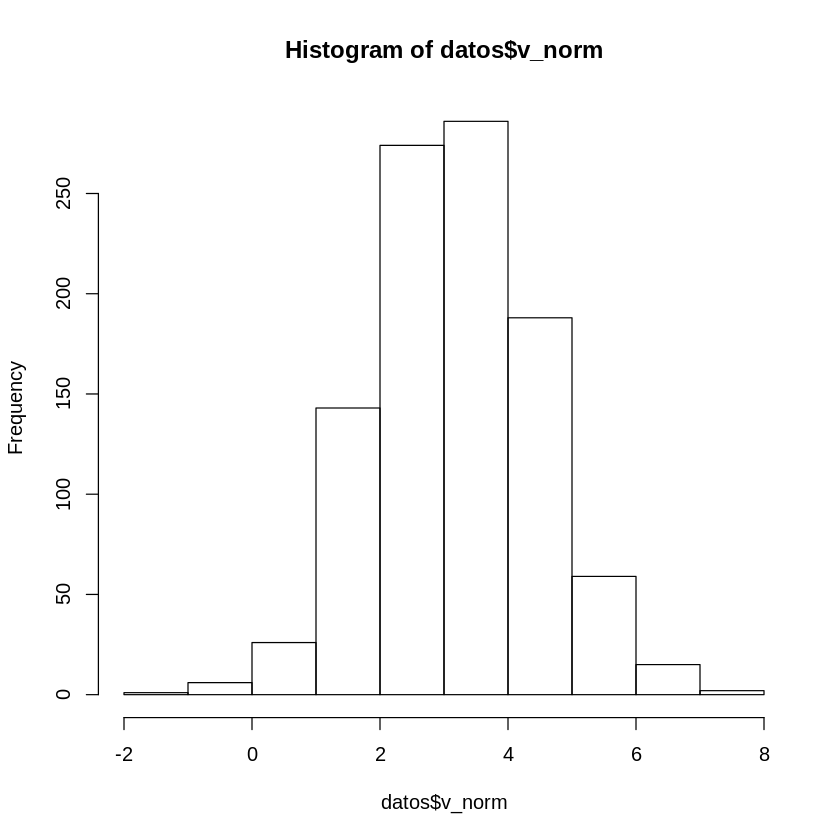

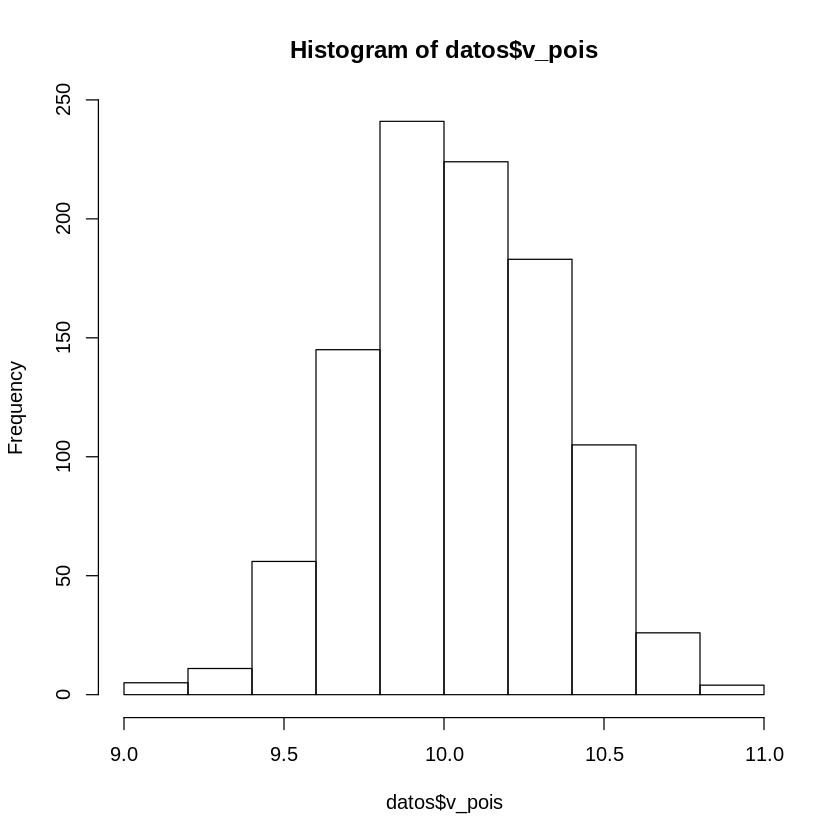

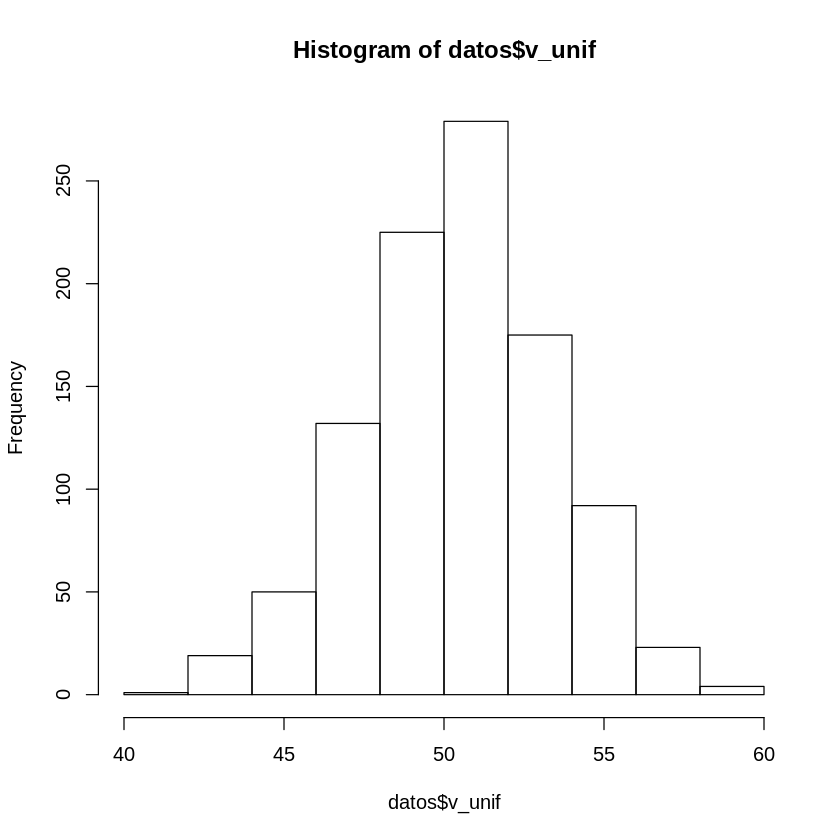

In [5]:
#Solucion Leo
X <- rnorm(20000, 3.18, 12.9476)
Y <- rpois(20000, 10)
Z <- runif(20000, 1, 100)

#tamano_1000[i] = mean(sample(1:10,1000,replace=T)
data = data.frame(X, Y, Z)

N=1000
v_norm = c()
v_pois = c()
v_unif = c()
for (i in 1:N){
    Sample <- data[sample(1:nrow(data), 100,replace=FALSE),] 
    v_norm = c(v_norm,mean(Sample$X))
    v_pois = c(v_pois,mean(Sample$Y))
    v_unif = c(v_unif,mean(Sample$Z))
}

datos = data.frame(v_norm,v_pois,v_unif)

media_alfa = vector() #para cada n

media_alfa[1] = mean(datos$v_norm)
media_alfa[2] = mean(datos$v_pois)
media_alfa[3] = mean(datos$v_unif)
media_alfa

S <- cov(datos)
S

hist(datos$v_norm)
hist(datos$v_pois)
hist(datos$v_unif)

## Reglas del Juego y Comentarios 

+ Celda de código que no ejecute anula la respuesta a todas las preguntas contenidas en esa celda a partir de la falla
+ Errores ortográficos, de redacción y oraciones ambiguas descontarán 1 punto c/u, con límite de 50 puntos. 
+ Dudas solamente hasta el día Martes 27 de Noviembre a las 15:00.
+ Dudas **principalmente** vía moodle, evite otro tipo de medio ya que su duda podría ser la de otro.
+ Cada día de atraso descuenta 25 puntos de la nota final con un máximo de dos días de retraso (después es 0).
+ La versión de R que se usará para revisar es 3.4.3
+ La versión de Python que se usará para revisar es 3.6.5
+ Los alumnos malla nueva que decidan responder las preguntas opcionales (obviando algún bonus para todos) tendrán 1 punto bonus por pregunta correctamente respondida, con un máximo de nota 100.
+ Use cualquier librería que estime conveniente, si requiere de instalación explicitarlo en el README (y bien explicitado).
+ Código comentado para facilitar entendimiento.
+ Sea formal y claro con su respuesta, explique su procedimiento y luego responda. 
+ Intente mantener un carácter científico durante la elaboración de su notebook.
+ Defina bien las secciones de su notebook [Tips para usar Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet)
